In [ ]:
#Plotting libraries:
from __future__ import division, print_function
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch


import pandas as pd
import numpy as np

#sklearn library:
from datetime import datetime
import os, sys
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.python.client import device_lib


# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras


#gemerate array from csv:
from numpy import genfromtxt

#randomly select images from a direcetory:
import os, random

#Import tqdm for progress bar
from tqdm import tqdm

#for unormalising:
import math
from sklearn.preprocessing import MinMaxScaler


from scipy.interpolate import griddata
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/Internships/UKAEA Internship/data/block2_heat'

/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat


In [ ]:
import glob
data = glob.glob('/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat' + '/*.csv')

data.sort() #put in order
print(data)

['/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_0.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_01.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_02.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_03.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_04.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_05.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_06.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_07.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_08.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_09.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat/heat_10.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block2

In [ ]:




tot_data = []


for i in data: #import csv for each timestep then append to above empty array 
  single_time = pd.read_csv(i, delimiter = ',')

  single_time = np.array(single_time)
  #single_time = single_time[single_time[:,4].argsort()] #put array in order of acending id
  #single_time = single_time[single_time[:,-1].argsort()] #put array in order of acending temp (bc there are some big anamolies)  

  

  tot_data.append(single_time)


t_d = np.stack(tot_data) 
print(np.shape(t_d))


(101, 3804, 6)


In [ ]:
print(    np.size(t_d)   )
print(    np.shape(t_d)    )   


ts_time = [] 


for i in range(0, np.shape(t_d)[0]  ):
  t = (t_d[i])[100][0] #pick some random row no. (picked 200 here) bc they are all the same


  ts_time.append(t)



print(ts_time)

2305224
(101, 3804, 6)
[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 1000.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0, 400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0, 600.0, 610.0, 620.0, 630.0, 640.0, 650.0, 660.0, 670.0, 680.0, 690.0, 700.0, 710.0, 720.0, 730.0, 740.0, 750.0, 760.0, 770.0, 780.0, 790.0, 800.0, 810.0, 820.0, 830.0, 840.0, 850.0, 860.0, 870.0, 880.0, 890.0, 900.0, 910.0, 920.0, 930.0, 940.0, 950.0, 960.0, 970.0, 980.0, 990.0]


In [ ]:
print(np.shape((    t_d[0:, 0: , 4:5]      ))   )
#print(  (t_d[0:, 0: , 4:5])[0:, 0:2]    )


#obtain pressure and displacement columns for each timestep:
# shape of below data = (timestep no., row no., column no.)

all_temp = t_d[0:, 0: , 5:6] 

all_xcoord = t_d[0:, 0: , 1:2]
all_ycoord = t_d[0:, 0: , 2:3]
all_zcoord = t_d[0:, 0: , 3:4]


print(all_xcoord[1])


print( ( max(all_xcoord[1])  - min(all_xcoord[1])    ) /  ( max(all_ycoord[1])  - min(all_ycoord[1])    )  )




(101, 3804, 1)
[[-0.5 ]
 [-0.47]
 [-0.47]
 ...
 [ 1.5 ]
 [ 1.5 ]
 [ 1.5 ]]
[3.]


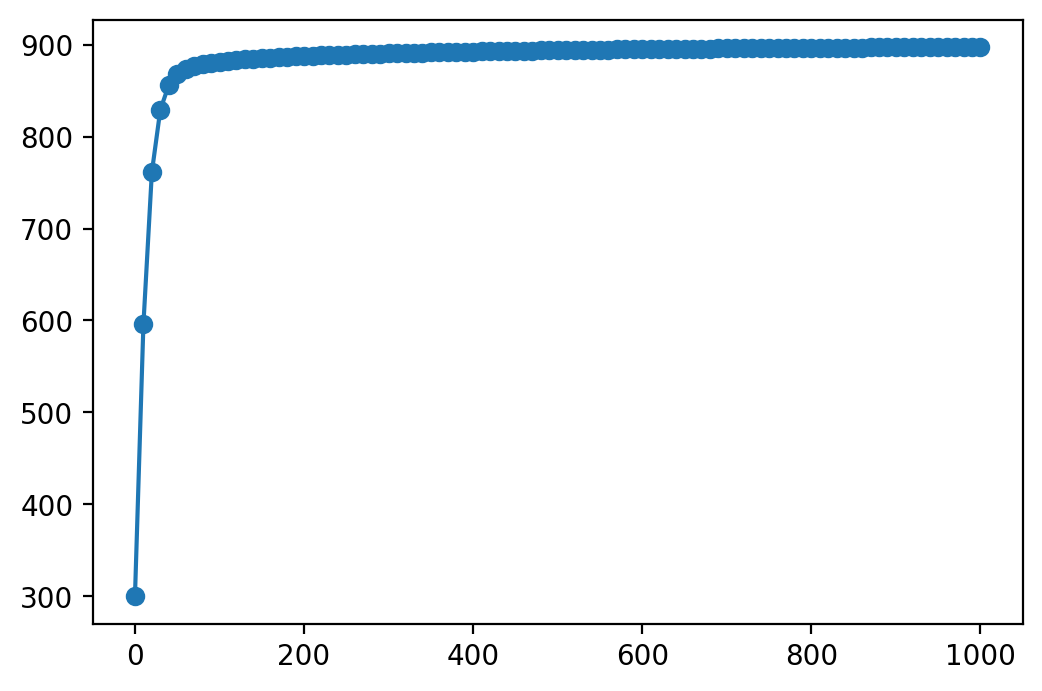

In [ ]:
plt.figure()
plt.plot(ts_time , np.reshape( all_temp[0:, 200:201], all_temp[0:, 300:301].size), '-o' )

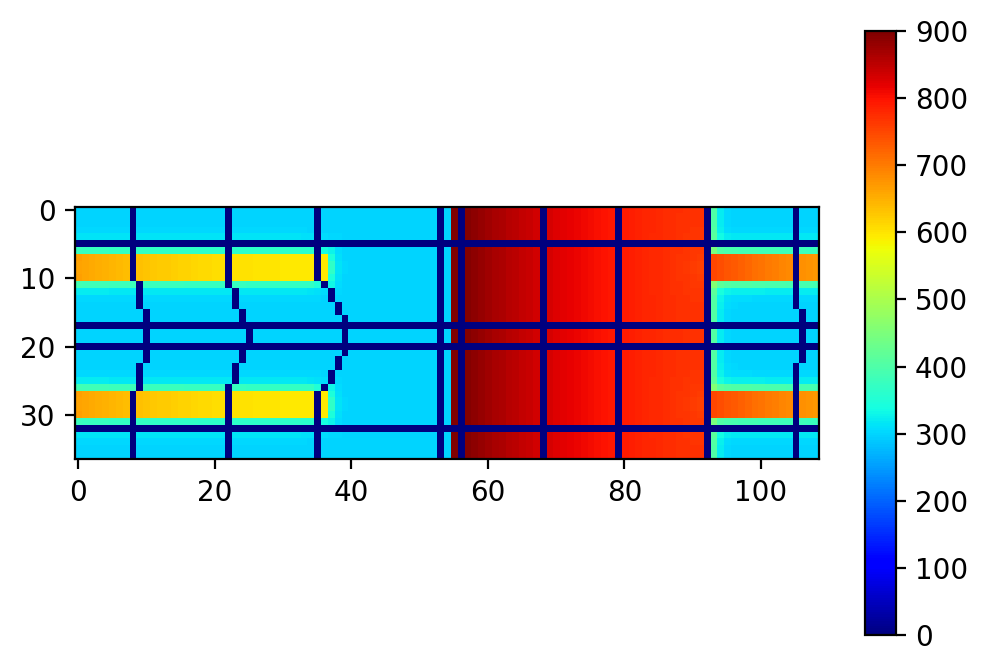

In [ ]:
#make colour image data -- shape = (coord, coord, temp/color):



all_xytemp = []

for i in range(0, np.shape(t_d)[0]  ):
  
  single_ts = np.append( (t_d[i])[0: , 1:3], all_temp[i], axis=-1)

  all_xytemp.append(single_ts)

all_xytemp = np.stack(all_xytemp)


img= []

for i in range(  all_xcoord.shape[0]  ):




  countx = 108
  county = 36



  image = np.zeros(   ( county  +1      ,     countx  +1   )   )    



  for j in range( 0, all_xytemp.shape[1]  ):
    intervalx = (np.max( all_xcoord[i] )  -  np.min( all_xcoord[i]) )/countx
    intervaly = (np.max( all_ycoord[i] )  -  np.min( all_ycoord[i]) )/county

    posx = ( all_xytemp[i][j][0]/ intervalx ) 
    posy = ( all_xytemp[i][j][1]/ intervaly ) 

    #print(posx, posy)
    #print(np.max( all_xcoord[i] ) )


    image[    int( posy  )   ][  int(   posx  )      ] =   all_xytemp[i][j][2]

  
  img.append(image)





plt.figure()
plt.imshow(img[1], cmap ='jet')
plt.colorbar()





In [ ]:
class distribution_img:
  '''plot the heat distribution using inputted temperature 
  data points and their coordinates
  '''
  def __init__(self, all_ycoord, all_xcoord, all_temp   ):
    self.all_ycoord  = all_ycoord
    self.all_xcoord = all_xcoord
    self.all_temp = all_temp


  def all_xytemp(self):
    '''x, y and t in adjacent columns for each timestep
    '''
    #this is for the `image()` func below
    
    all_xytemp = []
    
    for i in range(0, np.shape(self.all_xcoord)[0]  ): #loop for all timesteps
      xy = np.append( self.all_xcoord[i], self.all_ycoord[i], axis=1) #x and y
      xyt = np.append( xy, self.all_temp[i], axis=1) #x, y and temp
      
      all_xytemp.append(xyt)

    all_xytemp = np.stack(all_xytemp)

    return all_xytemp  
  



  def xy_size(self):
    '''number of data points along x axis and number of data points long y axis
    '''
    #xy_ratio = int(    ( max(self.all_xcoord[0])  - min(self.all_xcoord[0]) )   /  ( max(self.all_ycoord[0])  - min(self.all_ycoord[0]) )     ) #x range / y range 

    xy_ratio = 3

    x_size = np.sqrt(   xy_ratio  *  self.all_xcoord.shape[1]   )
    y_size = x_size/xy_ratio 


    #EXPLANATION OF ABOVE 2 LINES:
    # y size * x size = no. of rows (ie data)
    # therefore:   y size = x size / ratio 
    # therefore:  (x size * x size) / ratio =  no. of rows
    # therefore:   x size = sqrt(    ratio * no. of rows    )


    return int(x_size), int(y_size)



#NB: for the function above:  I picked first timestep to obtain the min,max and ratio (ie xxx[0])
#this is assuming all time steps have the same x and y range.... 
#if not then you can loop over all time steps and store xsize and y size in a list which can be indexed in the functions below within their loops



  def image(self):
    '''heat map for each timestep
    '''
    img= []
    
    for i in range(  self.all_xcoord.shape[0]  ): #loop for all timesteps
      image = np.zeros(   ( self.xy_size()[1]  +1,     self.xy_size()[0]  +1  )   )    #grid of zeros (x size by y size)
      
      
      for j in range( 0, self.all_xytemp().shape[1]  ): #loop for all coordinates
        
        intervalx = ( np.max( self.all_xcoord[i] )  -  np.min( self.all_xcoord[i]) )/self.xy_size()[0]  # the x data interval size (xrange/xsize)
        intervaly = ( np.max( self.all_ycoord[i] )  -  np.min( self.all_ycoord[i]) )/self.xy_size()[1]  # the y data interval size (yrange/ysize) 
        

        posx = ( self.all_xytemp()[i][j][0]/ intervalx ) #the number that the x-value is along the x-value line 
        posy = ( self.all_xytemp()[i][j][1]/ intervaly ) #the number that the y-value is along the y-value line 



        #replace values in the zeros grid ( that correspond with the temperature value's postion ) with the temperature value:
        image[  int( posy ) ][  int( posx ) ] =   self.all_xytemp()[i][j][2]  
        
        
      img.append(image)


    return img






  def plot(self, index):
    '''plot a heatmap for a single timestep

    index: timestep index
    '''
    plt.figure()
    plt.imshow(self.image()[index], cmap ='jet')
    plt.colorbar()



  


  
  


In [ ]:
class distribution_img:
  '''plot the heat distribution using inputted temperature 
  data points and their coordinates
  '''
  def __init__(self, all_ycoord, all_xcoord, all_temp   ):
    self.all_ycoord  = all_ycoord
    self.all_xcoord = all_xcoord
    self.all_temp = all_temp


  def all_xyt(self):
    '''x, y   &   x, y and t in adjacent columns for each timestep
    '''
    #this is for the `image()` func below



    all_xy = []
    all_xytemp = []
    
    for i in range(0, np.shape(self.all_xcoord)[0]  ): #loop for all timesteps
      xy = np.append( self.all_xcoord[i], self.all_ycoord[i], axis=1) #x and y
      xyt = np.append( xy, self.all_temp[i], axis=1) #x, y and temp
      
      all_xy.append(xy)
      all_xytemp.append(xyt)
      
    all_xytemp = np.stack(all_xytemp)

    return all_xy, all_xytemp  



  



  def xy_size(self):
    '''number of data points along x axis and number of data points long y axis
    '''
    xy_ratio = int(    ( max(self.all_xcoord[0])  - min(self.all_xcoord[0]) )   /  ( max(self.all_ycoord[0])  - min(self.all_ycoord[0]) )     ) #x range / y range 


    x_size = np.sqrt(   xy_ratio  *  self.all_xcoord.shape[1]   )
    y_size = x_size/xy_ratio 


    #EXPLANATION OF ABOVE 2 LINES:
    # y size * x size = no. of rows (ie data)
    # therefore:   y size = x size / ratio 
    # therefore:  (x size * x size) / ratio =  no. of rows
    # therefore:   x size = sqrt(    ratio * no. of rows    )


    return int(x_size), int(y_size)



#NB: for the function above:  I picked first timestep to obtain the min,max and ratio (ie xxx[0])
#this is assuming all time steps have the same x and y range.... 
#if not then you can loop over all time steps and store xsize and y size in a list which can be indexed in the functions below within their loops



  def images(self):
    '''heat map for each timestep
    '''
    xmax = max(self.all_xcoord[0]) 
    xmin = min(self.all_xcoord[0])
    ymax = max(self.all_ycoord[0])
    ymin = min(self.all_ycoord[0]) 


    x_size = self.xy_size()[0]  #no. of points along x axis
    y_size = self.xy_size()[1]  #no. of points along y axis
    #NB: set default density:  size = 300 x 100 (30000 temp points)... therefore `density` variable = how many times more dense than default


    xsize_inp = (x_size + 1) * 1j #has to be inputted with +1 and must be imaginary for np.mgrid
    ysize_inp = (y_size + 1) * 1j


    points = self.all_xyt()[0] #x and y


    grid_x, grid_y = np.mgrid[xmin:xmax:xsize_inp, ymin:ymax:ysize_inp] #from x and y meshgrid

    all_images = []

    for i in range( self.all_xcoord.shape[0]): #loop for all timesteps
      grid = griddata(points[i], self.all_temp[i], (grid_x, grid_y), method='nearest')
      grid = grid.reshape( grid.shape[0], grid.shape[1]) #reshape to get rid of extra dim in order to plot

      all_images.append(grid.T) #transpose grid to make it x vs y, instead of y vs x



    return all_images






  def plot_single(self, index):
    '''plot a heatmap for a single timestep

    index: timestep index
    '''
    xmax = max(self.all_xcoord[0]) 
    xmin = min(self.all_xcoord[0])
    ymax = max(self.all_ycoord[0])
    ymin = min(self.all_ycoord[0]) 

    plt.figure()
    plt.imshow( self.images()[index], origin='lower', cmap='jet')
    plt.title('Temperature Distribution Across Domain at t={}s'.format(index))


    cb = plt.colorbar()
    cb.set_label("Temperature ('C)")
    plt.tight_layout()

    os.chdir('/content/drive/My Drive/Internships/UKAEA Internship/data/image_results') #change directory to save in specific folder


    plt.savefig('Temperature_{}.png'.format(index))
    os.chdir('/content/drive/My Drive/Internships/UKAEA Internship/data/block2_heat') #change back directory



  #def plot_total(self):
    '''plot a heatmap for all timesteps

    index: timestep index
    '''
    #xmax = max(self.all_xcoord[0]) 
    #xmin = min(self.all_xcoord[0])
    #ymax = max(self.all_ycoord[0])
    #ymin = min(self.all_ycoord[0]) 

    #for i in range(    np.shape(  self.images()  )[0]    ):
      #plt.figure()
      #plt.imshow( self.images()[i], origin='lower', cmap='jet') 
      #plt.colorbar()


  


  

(101, 109, 37)
(4033,)


Text(0.5, 1.0, 'Linear')

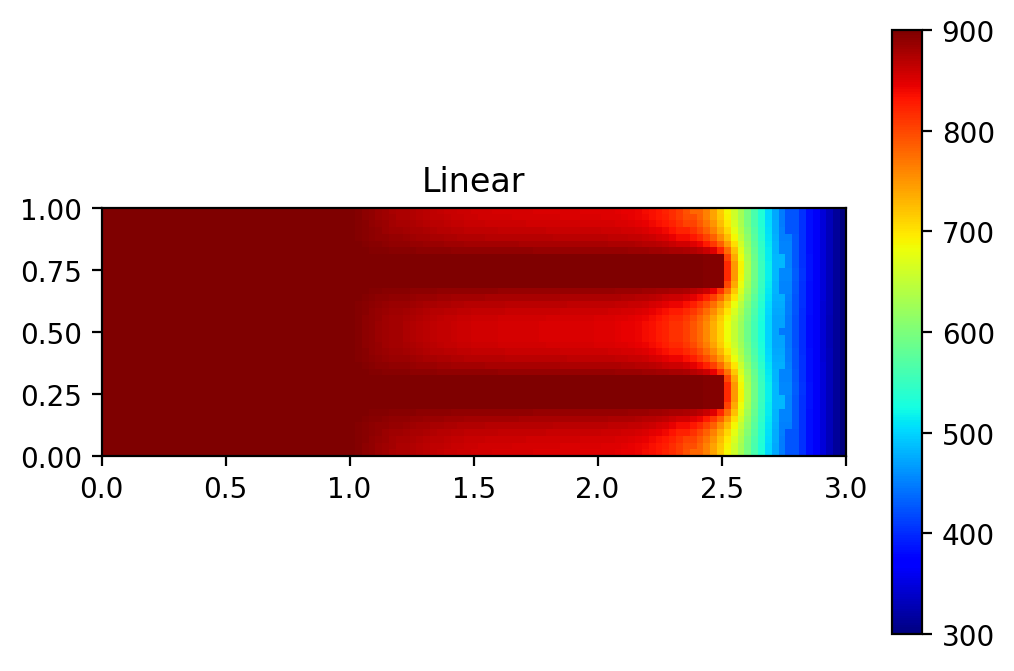

In [ ]:
from scipy.interpolate import griddata

points = t_d[0:, 0: , 1:3]


xy_ratio = int(    ( max(all_xcoord[70])  - min(all_xcoord[70])    ) /  ( max(all_ycoord[70])  - min(all_ycoord[70])    )    )
xmax = max(all_xcoord[70]) 
xmin = min(all_xcoord[70]) 

ymax = max(all_ycoord[70]) 
ymin = min(all_ycoord[70]) 


grid_x, grid_y = np.mgrid[xmin:xmax:109j, ymin:ymax:37j]

grid = []
for i in range(101):
  grid_z0 = griddata(points[i], all_temp[i], (grid_x, grid_y), method='nearest')
  grid_z0 = grid_z0.reshape( grid_z0.shape[0], grid_z0.shape[1])

  grid.append(grid_z0)



#print(grid)
#print(grid[1])
print(np.shape(grid) )
print(np.shape(grid[1].flatten()) )

plt.figure()
plt.imshow(grid_z0.T, extent=(0,xy_ratio,0,1), origin='lower', cmap='jet')
plt.colorbar()
plt.title('Linear')

#plt.figure()
#plt.imshow(func(grid_x, grid_y).T, (0,xy_ratio,0,1), origin='lower')
#plt.plot(all_xcoord[70], all_ycoord[70], 'k.', ms=1)



#STILL A LITTLE INTERPOLATED DUE TO PLT.IMSHOW

In [ ]:
print(grid_z0.flatten().size)

(101, 301, 101)
(30401,)


Text(0.5, 1.0, 'Linear')

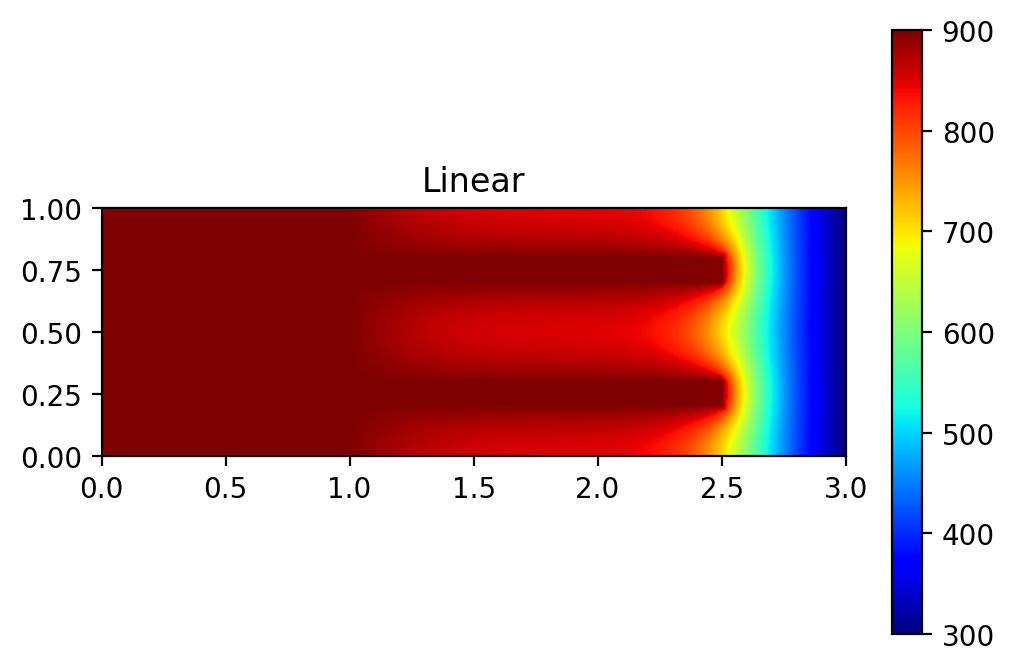

In [ ]:
from scipy.interpolate import griddata

points = t_d[0:, 0: , 1:3]


xy_ratio = int(    ( max(all_xcoord[70])  - min(all_xcoord[70])    ) /  ( max(all_ycoord[70])  - min(all_ycoord[70])    )    )
xmax = max(all_xcoord[70]) 
xmin = min(all_xcoord[70]) 

ymax = max(all_ycoord[70]) 
ymin = min(all_ycoord[70]) 


grid_x, grid_y = np.mgrid[xmin:xmax:301j, ymin:ymax:101j]

grid = []
for i in range(101):
  grid_z0 = griddata(points[i], all_temp[i], (grid_x, grid_y), method='linear')
  grid_z0 = grid_z0.reshape( grid_z0.shape[0], grid_z0.shape[1])

  grid.append(grid_z0)



#print(grid)
#print(grid[1])
print(np.shape(grid) )
print(np.shape(grid[1].flatten()) )

plt.figure()
plt.imshow(grid_z0.T, extent=(0,xy_ratio,0,1), origin='lower', cmap='jet')
plt.colorbar()
plt.title('Linear')

#plt.figure()
#plt.imshow(func(grid_x, grid_y).T, (0,xy_ratio,0,1), origin='lower')
#plt.plot(all_xcoord[70], all_ycoord[70], 'k.', ms=1)

[[-1.5  -1.5  -1.5  ... -1.5  -1.5  -1.5 ]
 [-1.49 -1.49 -1.49 ... -1.49 -1.49 -1.49]
 [-1.48 -1.48 -1.48 ... -1.48 -1.48 -1.48]
 ...
 [ 1.48  1.48  1.48 ...  1.48  1.48  1.48]
 [ 1.49  1.49  1.49 ...  1.49  1.49  1.49]
 [ 1.5   1.5   1.5  ...  1.5   1.5   1.5 ]]
(301, 101)
[-1.5 -1.5 -1.5 ...  1.5  1.5  1.5]
(101, 3804, 1)
(2, 30401, 1)
(2, 30401, 1)
(2, 30401, 1)
[[[-1.5]
  [-1.5]
  [-1.5]
  ...
  [ 1.5]
  [ 1.5]
  [ 1.5]]

 [[-1.5]
  [-1.5]
  [-1.5]
  ...
  [ 1.5]
  [ 1.5]
  [ 1.5]]]
[[[900.]
  [900.]
  [900.]
  ...
  [300.]
  [300.]
  [300.]]

 [[900.]
  [900.]
  [900.]
  ...
  [300.]
  [300.]
  [300.]]]


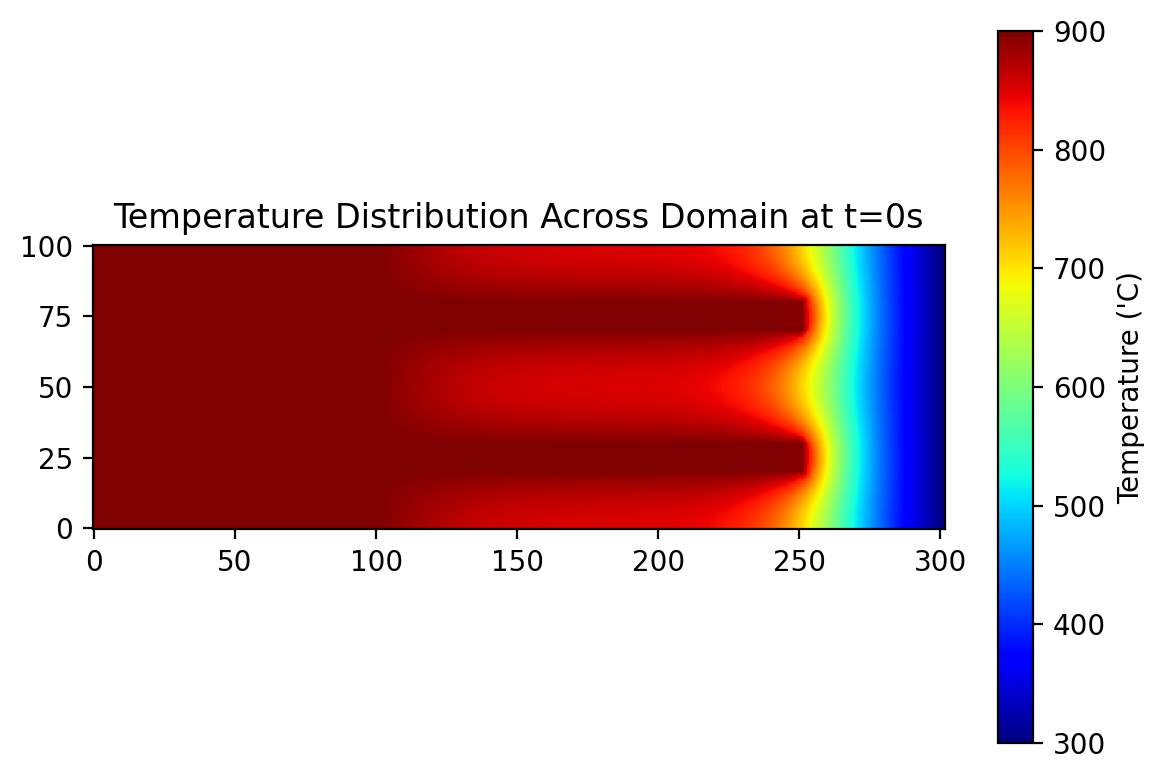

In [ ]:
print(grid_x)
print(np.shape(grid_x))
print(np.array(grid_x.flatten()) )
print(np.shape(all_xcoord))

grid_z0 = grid[100]

flat_xgrid = grid_x.flatten()
flat_ygrid = grid_y.flatten()
flat_temp =  grid_z0.flatten()


xdata1 = np.array([ flat_xgrid ])
ydata1 = np.array([ flat_ygrid ])
temp1 = np.array([ flat_temp ])



xdata2 = np.array([ flat_xgrid ])
ydata2 = np.array([ flat_ygrid ])
temp2 = np.array([ flat_temp ])




xdata = np.append( xdata1, xdata2, axis=0)
ydata = np.append( ydata1, ydata2, axis=0)
temp = np.append( temp1, temp2, axis=0)

xdata = xdata.reshape(xdata.shape[0], xdata.shape[1], 1)
ydata = ydata.reshape(ydata.shape[0], ydata.shape[1], 1)
temp = temp.reshape(temp.shape[0], temp.shape[1], 1)


print(np.shape(xdata))
print(np.shape(ydata))
print(np.shape(temp))



interp_temp_img = distribution_img(ydata, xdata, temp)
interp_temp_img.plot_single(0)

print(xdata)
print(temp)

In [ ]:
print(min( xdata[0]) )

[0.5]


In [ ]:
class interpolate_distribution:
  def __init__(self, all_ycoord, all_xcoord, all_temp  ):
    self.all_ycoord  = all_ycoord
    self.all_xcoord = all_xcoord
    self.all_temp = all_temp


  def xy_joint(self):
    '''x and y in adjacent columns for each timestep
    '''

    all_xy = []
    
    for i in range( self.all_xcoord.shape[0] ): #loop for all timesteps
      points = np.append(self.all_xcoord[i], self.all_ycoord[i], axis=1)

      all_xy.append(points)

    return all_xy



  def xy_max_min(self):
    xmax = max(  self.all_xcoord[0]) 
    xmin = min(  self.all_xcoord[0]) 
    
    ymax = max(  self.all_ycoord[0]) 
    ymin = min(  self.all_ycoord[0]) 


    return (xmax, xmin, ymax, ymin)



  def xy_ratio(self):
    xy_ratio = int(    ( max(self.all_xcoord[0])  - min(self.all_xcoord[0])    ) /  ( max(self.all_ycoord[0])  - min(self.all_ycoord[0])    )    ) #x range / y range 

    return xy_ratio # = 3 for this data

#NB: for the 2 functions above:  I picked first timestep to obtain the min,max and ratio (ie xxx[0])
#this is assuming all time steps have the same x and y range.... 
#if not then you can loop over all time steps and store min,max and ratios in a list which can be indexed in the functions below within their loops




  def interp_grid(self, density):
    '''Interpolate the grid of temperature distribution
    '''

    xmax = self.xy_max_min()[0]
    xmin = self.xy_max_min()[1]
    ymax = self.xy_max_min()[2]
    ymin = self.xy_max_min()[3]


    x_size = self.xy_ratio()*100 *density  #no. of points along x axis... ratio = 3 for this data
    y_size = 1*100 *density  #no. of points along y axis
    #NB: set default density:  size = 300 x 100 (30000 temp points)... therefore `density` variable = how many times more dense than default


    xsize_inp = (x_size + 1) * 1j #has to be inputted with +1 and must be imaginary for np.mgrid
    ysize_inp = (y_size + 1) * 1j


    points = self.xy_joint()


    grid_x, grid_y = np.mgrid[xmin:xmax:xsize_inp, ymin:ymax:ysize_inp] #from x and y meshgrid

    all_images = []

    for i in range( self.all_xcoord.shape[0]): #loop for all timesteps
      grid = griddata(points[i], self.all_temp[i], (grid_x, grid_y), method='linear')
      grid = grid.reshape( grid.shape[0], grid.shape[1]) #reshape to get rid of extra dim in order to plot

      all_images.append(grid) 



    return all_images, grid_x, grid_y #return x & y grid for replotting after training


  def plot(self, index):
    '''plot interpolated heatmap for a single timestep

    index: timestep ind
    '''

    plt.figure()
    plt.imshow(  ( self.interp_grid().T[0] )[index],       extent=(0, self.xy_ratio()   ,   0, 1),  origin='lower', cmap='jet')  #transpose grid to make it x vs y, instead of y vs x
    plt.colorbar()
    plt.title('Linear Interpolation')



In [ ]:
class every_func:
  def __init__(self, inp_ydata, windowsize, offset, steps, input_nuerons, output_nuerons, time_data, dens_scale_factor, train_size  ):
    self.inp_ydata  = inp_ydata
    self.windowsize = windowsize
    self.offset = offset
    self.steps = steps
    self.input_nuerons = input_nuerons
    self.output_nuerons = output_nuerons
    self.time_data = time_data
    self.dens_scale_factor = dens_scale_factor
    self.train_size = train_size


  def interpolate(self):
    '''Interpolate the Data
    Input: time_data and input data
    Output: A 2 coloumn array of the denser time data and y data
    '''
    new_time = np.linspace(min(ts_time), max(ts_time), int(self.dens_scale_factor*len(ts_time)) + 1)  #denser time/x data by scale factor dens_scale_factor
    yinterp = np.interp(new_time, self.time_data, self.inp_ydata)  #evaluate new y data at the denser time/x data points

    return ([new_time, yinterp])

      
  def normalise(self):
    '''Normalise Data
    '''
    scaler = MinMaxScaler(feature_range=(0, 1))
    norm_arr = scaler.fit_transform(         np.array( self.interpolate()[1] ).reshape( np.array( self.interpolate()[1]).shape[0] , 1 )        )
        
    return norm_arr





  def shapeArray(self, arr):
    '''Labels and Input Arrays
    '''
    Input= np.array([arr[i : i + self.windowsize] for i in range(len(arr)-(self.windowsize + self.offset)+1)])   #input arrays 
    Label= np.array([arr[i + self.windowsize : i+ self.windowsize + self.offset] for i in range( len(arr) - (self.windowsize + self.offset)+1)])  #label arrays
    return (Input,Label)
    
    
    
        


        
   
    
  def network(self):
    '''Reccurent Neural Network
    '''

    rnn = keras.models.Sequential()
    rnn.add(keras.layers.LSTM(self.input_nuerons, input_shape=(None,1),return_sequences=True)) # LSTM layer with 20 neurons        
    #rnn.add(keras.layers.Dense(50, activation="relu"))
    #rnn.add(keras.layers.Dense(50, activation="relu"))
    rnn.add(keras.layers.Dense(101, activation="relu")) 
    #^^^hidden dense layer... made a big difference!... same number of neurons as timesteps... did this have something to do with

    rnn.add(keras.layers.Dense(self.output_nuerons, activation="linear"))
    rnn.compile(loss='mse',optimizer='adam')
    #rnn.summary()

    return rnn


        

  def train_pred(self):
    '''Train NN and Predict Time Series
    Input: time_data and normalised input data
    Output: A 2 coloumn array of the loss for training and the predicted time series
    '''
    costs=np.zeros(  self.steps  ) #array of costs (all 0 atm)
    rnn= self.network() #call network
        
       
    #TRAIN#    
    for i in tqdm(range(     self.steps  )):
      yInput, yLabel = self.shapeArray(   self.normalise()[0: int(   self.train_size*len(  self.normalise()  ))  ]) #shape input arrays + pick certain training size for input (train_size)
 
            
      # Now we need to reshape the array into batchsize * window size * features (1)
      y_in=yInput.reshape(yInput.shape[0],yInput.shape[1],1)  # Reshape the input array to have the dimensions (batchsize,time samples, features)
      # We only want a single number for the target (since we set return_sequences=False above). We will take the last sample of the yLabel
      y_target = yLabel[:,-1].reshape(yLabel.shape[0], 1) # Reshape the output array to have the dimensions (batchsize, time samples)
            
      costs[i] = rnn.train_on_batch(y_in , y_target) #Train the network and substitute costs into cost array
             
            
    #PREDICT#
    yInput_test, yLabel_test = self.shapeArray(self.normalise())  #shape test arrays + test data size is full size of original data
    yTest_in = yInput_test.reshape(yInput_test.shape[0], yInput_test.shape[1], 1) 

    y_Test = rnn.predict_on_batch(   yTest_in.reshape(yTest_in.shape[0], self.windowsize, 1)   ) #predict

    
    return ([costs, y_Test])

  
  
  def unormalise(self, arr):
    '''Unormalise Data
    '''

    min_og = min(self.inp_ydata) #minimum of original data
    max_og = max(self.inp_ydata) #maximum of original data
    arr = np.array(arr)


    scaler2 = MinMaxScaler(   feature_range=(min_og, max_og)   ) #range = min_og to max_og
    unorm_array = scaler2.fit_transform(    arr.reshape(    arr.shape[0], arr.shape[1]    )        )
    
    return unorm_array





  def costplot(self, costs ):
    '''Costs vs Epochs/Steps Plot 
    '''
    fig,ax=plt.subplots()
    ax.plot(  np.arange(self.steps),  costs,label=r"Costs")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Cost")
    ax.set_title("Network Training Cost")
    ax.legend()    



        
  def pred_plot(self, pred):
    
    fig,ax = plt.subplots()
    ax.plot(self.time_data,  self.inp_ydata,   label="Target") #full data        

    #input training data plot (train_size)    
    ax.plot( self.time_data[0: int(self.train_size*len(self.time_data))],  self.inp_ydata[0: int(self.train_size*len(self.inp_ydata))]    ,label="Training Data")  

    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Variable at a certain coordinate")
    ax.set_title("Network Prediction")


    #unormalised prediction plot (unormalised interpolated prediction vs interpolated time):
    ax.plot(          (    self.interpolate()[0]       )[   self.windowsize+self.offset-1:] , self.unormalise(pred)[:,-1] , label="Prediction") 
    #^^^[:,-1] is to output only the last prediction from the nn^^^

    ax.legend()
        

    

    
    

In [ ]:
def interpolated_temp(all_ycoord, all_xcoord, all_temp, density):
    interp = interpolate_distribution( all_ycoord, all_xcoord, all_temp)

    #interp.xy_joint()
    #interp.xy_max_min()
    #interp.xy_ratio()

    temp_grid = interp.interp_grid(density )[0] #interpolated temperature distrubution on a grid!
    xgrid = interp.interp_grid(density )[1]
    ygrid = interp.interp_grid(density )[2]



    #flatten grids and make into array:

    temp = [] #temp data
    for i in range(all_xcoord.shape[0]): #loop for all timesteps
      temp_flat = temp_grid[i].flatten()
      temp_flat = np.array([temp_flat])
      
      temp.append(temp_flat)


    x = [] #x data
    for i in range(all_xcoord.shape[0]): #loop for all timesteps
      x_flat = xgrid[i].flatten()
      x_flat = np.array([x_flat])
      
      x.append(x_flat)

    y = [] #y data
    for i in range(all_xcoord.shape[0]): #loop for all timesteps
      y_flat = ygrid[i].flatten()
      y_flat = np.array([y_flat])
      
      y.append(y_flat)


    return temp, x, y

In [ ]:
def prediction(data, time_data, windowsize, offset, steps, input_nuerons, output_neurons, dens_scale_factor, train_size):
  '''interpolation, normalisation, shaping input data arrays,  rnn, training rnn, predicting using rnn, unormalising and plotting
  '''


  all = every_func(data, windowsize, offset, steps, input_nuerons, output_neurons, time_data, dens_scale_factor, train_size)

  #all.interpolate()
  #all.shapeArray(ts_disx)
  
  #all.allwork(4, 1)
  #all.train(0.6)

  train_pred = all.train_pred()

  #all.costplot(   train_pred[0]   )
  
  #all.pred_plot( train_pred[1] )


  #all.unormalise(train_pred[1])

  return all.unormalise(train_pred[1])



  


In [ ]:
temp = interpolated_temp(all_ycoord, all_xcoord, all_temp, 1.0)[0]
print(np.shape(temp))


#print(temp)

(101, 1, 30401)


In [ ]:
temp = np.array(temp) #must be array for the loop below
#temp = np.reshape(temp,      ( np.shape(temp)[0],  np.shape(temp)[2] , 1)  )
temp = temp.reshape(temp.shape[0], temp.shape[2], 1) #change shape from (101, 1, 30401) to (101, 30401, 1)
print(np.shape(temp) )
print((temp))

(101, 30401, 1)
[[[300.]
  [300.]
  [300.]
  ...
  [300.]
  [300.]
  [300.]]

 [[900.]
  [900.]
  [900.]
  ...
  [300.]
  [300.]
  [300.]]

 [[900.]
  [900.]
  [900.]
  ...
  [300.]
  [300.]
  [300.]]

 ...

 [[900.]
  [900.]
  [900.]
  ...
  [300.]
  [300.]
  [300.]]

 [[900.]
  [900.]
  [900.]
  ...
  [300.]
  [300.]
  [300.]]

 [[900.]
  [900.]
  [900.]
  ...
  [300.]
  [300.]
  [300.]]]


In [ ]:
start_time = time.time()

pred = []
for i in range(  4000,   np.shape(temp)[1]  ): #loop over all coordinates
  all_var_data = np.reshape(    temp[0:, (i-1):i],  np.size( temp[0:, (i-1):i] )   ) #all the coordinates throughout the time series 

  if (  np.sum(all_var_data)>0): #make sure that timeseries is not constantly 0
    predic = prediction(   all_var_data   , ts_time, 1, 1, 100, 4, 1, 1, 0.6)    

    pred.append(predic)
  
time_taken = start_time - time.time()

  0%|          | 0/100 [00:00<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
#print(pred)
print(np.shape(pred))
print(np.reshape(pred, (np.shape(pred)[1], np.shape(pred)[0], 1  ))   )

(3, 101, 1)
[[[300.     ]
  [828.5442 ]
  [884.3181 ]]

 [[894.00684]
  [896.6946 ]
  [897.69507]]

 [[898.1492 ]
  [898.4065 ]
  [898.5696 ]]

 [[898.687  ]
  [898.77295]
  [898.79224]]

 [[898.8037 ]
  [898.8159 ]
  [898.82764]]

 [[898.8396 ]
  [898.85156]
  [898.8635 ]]

 [[898.87524]
  [898.88696]
  [898.8989 ]]

 [[898.9109 ]
  [898.92285]
  [898.9348 ]]

 [[898.94653]
  [898.9585 ]
  [898.97   ]]

 [[898.9824 ]
  [898.9939 ]
  [899.0061 ]]

 [[899.01807]
  [899.0298 ]
  [899.0415 ]]

 [[899.0532 ]
  [899.0654 ]
  [899.07715]]

 [[899.08936]
  [899.1011 ]
  [899.1128 ]]

 [[899.12476]
  [899.1365 ]
  [899.1487 ]]

 [[899.16016]
  [899.17236]
  [899.1843 ]]

 [[899.19604]
  [899.20776]
  [899.2197 ]]

 [[899.2317 ]
  [899.2434 ]
  [899.2556 ]]

 [[899.2676 ]
  [899.2793 ]
  [899.291  ]]

 [[899.30273]
  [899.31494]
  [899.32666]]

 [[899.33887]
  [899.35034]
  [899.3623 ]]

 [[899.37427]
  [899.3862 ]
  [899.39795]]

 [[899.4099 ]
  [899.4219 ]
  [899.4336 ]]

 [[899.4453 ]
  [899

In [ ]:
print(all_temp.shape)

(101, 3804, 1)


  0%|          | 0/100 [00:00<?, ?it/s]


KeyboardInterrupt: ignored

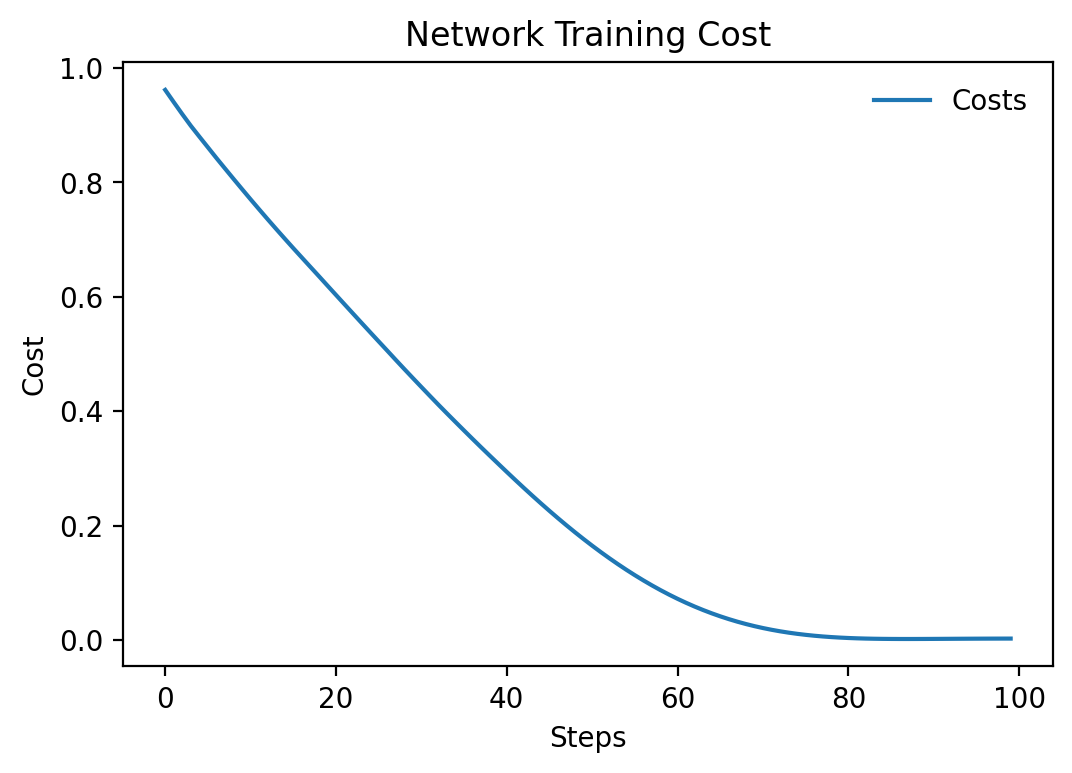

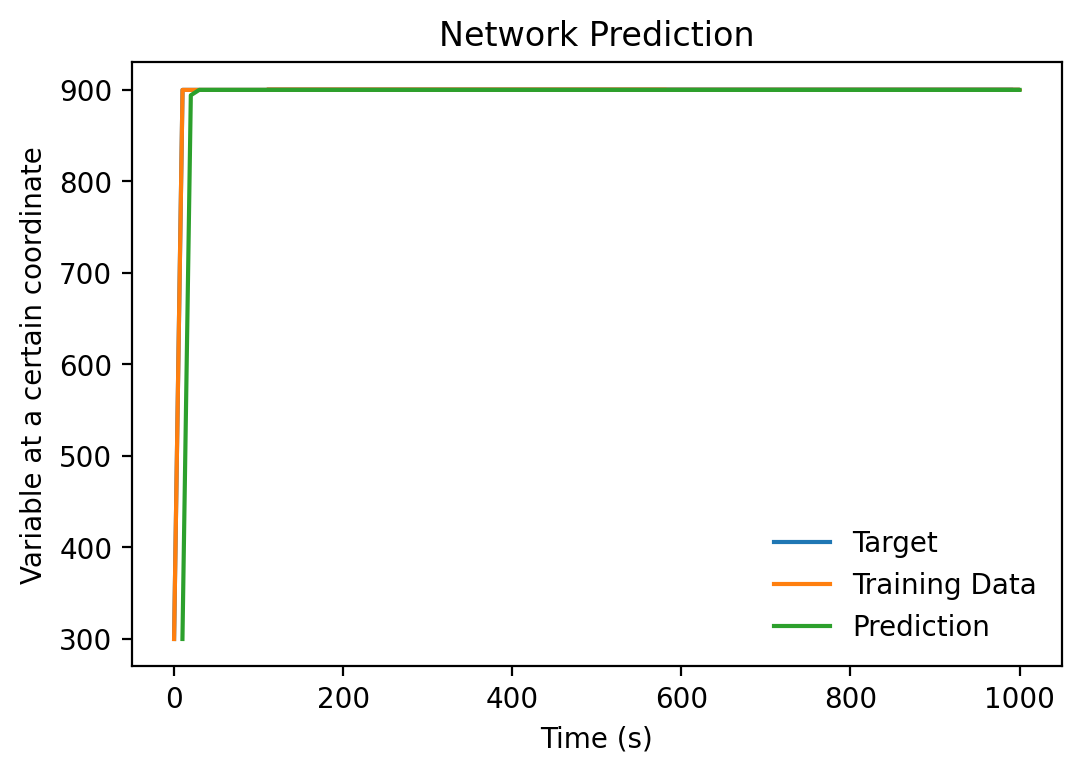

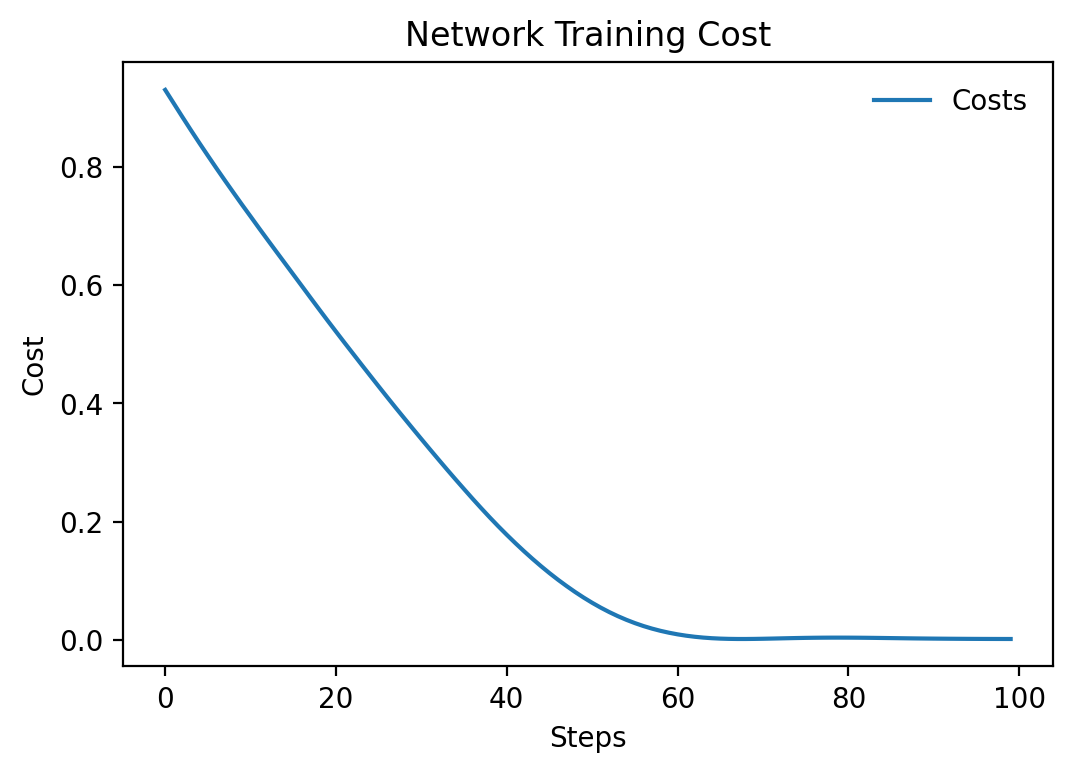

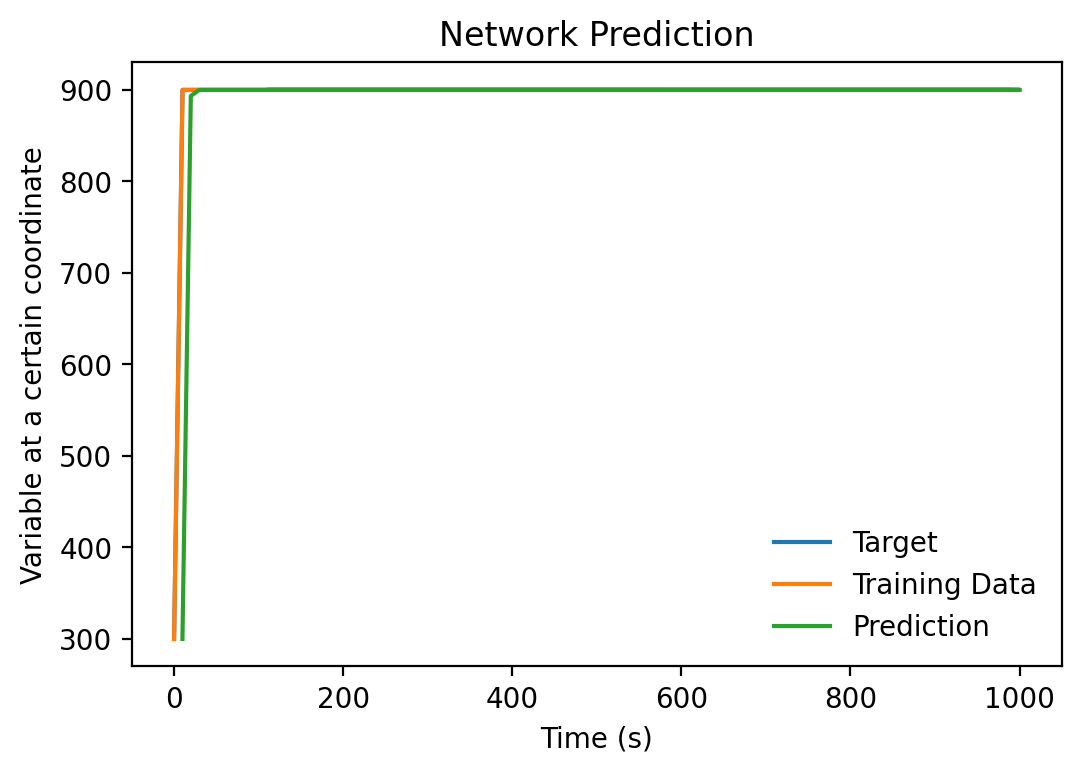

In [ ]:
for i in range(  1,   np.shape(temp)[1]  ): #loop over all coordinates
  all_var_data = np.reshape(    temp[0:, (i-1):i],  temp[0:, (i-1):i].size    ) #all the data throughout the time series for a single variable

  if (  np.sum(all_var_data)>0): #make sure that timeseries is not constantly 0
    prediction(   all_var_data   , ts_time, 1, 1, 100, 4, 1, 1, 0.6)  

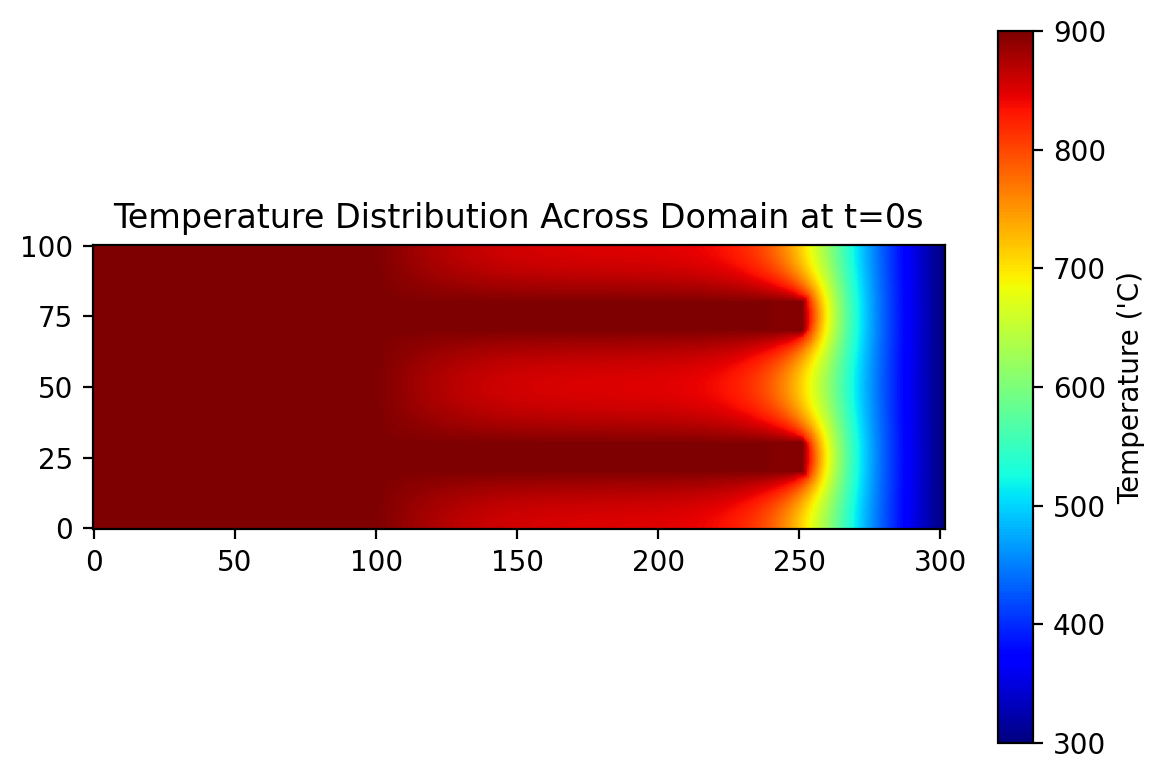

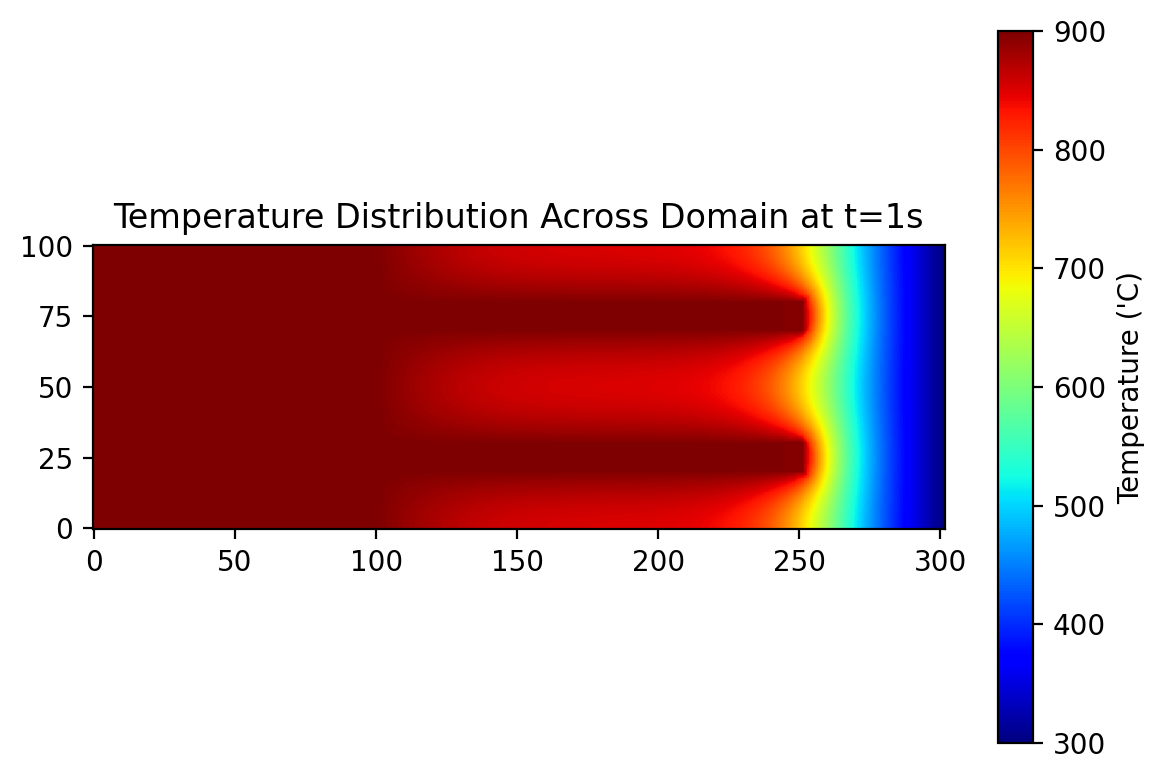

In [ ]:
interp_temp_img = distribution_img(ydata, xdata, temp[99:])
#interp_temp_img.plot_single()




for i in range(xdata.shape[0]):
  interp_temp_img.plot_single(i) #plot and save plot to certain directory (shown in function)
  #plt.close()



In [ ]:
print(xdata)
print(ydata)

[[[-1.5]
  [-1.5]
  [-1.5]
  ...
  [ 1.5]
  [ 1.5]
  [ 1.5]]

 [[-1.5]
  [-1.5]
  [-1.5]
  ...
  [ 1.5]
  [ 1.5]
  [ 1.5]]]
[[[-0.5 ]
  [-0.49]
  [-0.48]
  ...
  [ 0.48]
  [ 0.49]
  [ 0.5 ]]

 [[-0.5 ]
  [-0.49]
  [-0.48]
  ...
  [ 0.48]
  [ 0.49]
  [ 0.5 ]]]


In [ ]:
for f in filelist:
  interp_temp_img.plot_single(i)

  cb.set_label("Temperature ('C)")
  plt.tight_layout()

  plt.savefig('{}{}')


In [ ]:
!pip install imageio
#!pip install imageio.v2

import imageio
#import imageio.v2 as imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def make_gif(input_folder, save_filepath):
  episode_frames = []
  time_per_step = 0.40

  for root, _, files in os.walk(input_folder):
    file_paths = [os.path.join(root, file) for file in files]
    file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))

    episode_frames = [imageio.imread(file_paths) for file_paths in file_paths if file_paths.endswith('.png')]

    episode_frames = np.array(episode_frames)

    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

directory = '/content/drive/My Drive/Internships/UKAEA Internship/data/image_results'
make_gif(  directory,   os.path.join(directory, "Animation_Temperature.gif")   )
print("Create animation file")

Create animation file
